# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset.

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [1]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
import numpy as np
# Inspect the shapes of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# One-hot encoding on a given array of class labels.
def one_hot(n_classes, y):
    return np.eye(n_classes)[y]

num_classes = len(class_names)

y_train_one_hot = one_hot(num_classes, y=y_train)
y_test_one_hot = one_hot(num_classes, y=y_test)

print("y_train_one_hot shape:", y_train_one_hot.shape)
print("y_test_one_hot shape:", y_test_one_hot.shape)

# Print a few examples of the one-hot encoded labels
print("\nFirst 5 one-hot encoded training labels:")
display(y_train_one_hot[:5])
print("\nFirst 5 one-hot encoded test labels:")
display(y_test_one_hot[:5])

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
y_train_one_hot shape: (60000, 10)
y_test_one_hot shape: (10000, 10)

First 5 one-hot encoded training labels:


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])


First 5 one-hot encoded test labels:


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

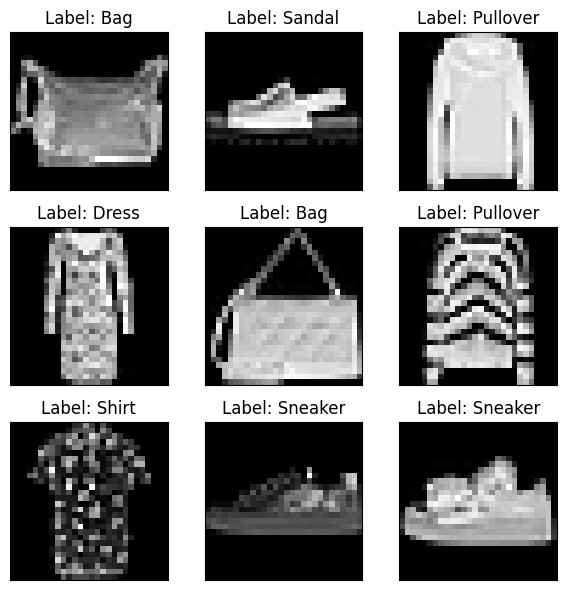

In [4]:
import matplotlib.pyplot as plt

# Selecting 9 random indices
random_indices = np.random.choice(len(X_train), 9, replace=False)

# Creating a 3x3 grid plot
fig, axes = plt.subplots(3, 3, figsize=(6, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[random_indices[i]], cmap='gray')
    ax.set_title(f"Label: {class_names[y_train[random_indices[i]]]}")

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

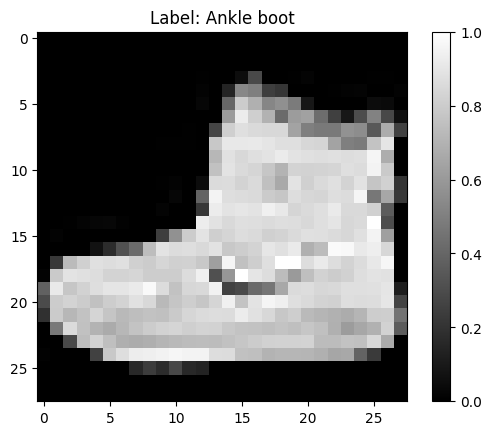

Original label for the first image: 9
One-hot encoded label for the first image: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [5]:
import matplotlib.pyplot as plt

# Display the first image and its label
plt.figure()
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {class_names[y_train[0]]}")
plt.colorbar()
plt.grid(False)
plt.show()

print("Original label for the first image:", y_train[0])
print("One-hot encoded label for the first image:", y_train_one_hot[0])

Question: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

Answer: The labels appear to match the images. The images are of very low resolution but are still discernible. It is difficult to distinguish between certain items, such as a Pullover and a Shirt, or a Coat and a Pullover, based on the random images observed.

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2515 - loss: 9.2925 - val_accuracy: 0.2622 - val_loss: 10.9502
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3003 - loss: 9.1870 - val_accuracy: 0.3043 - val_loss: 8.6636
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3284 - loss: 9.8619 - val_accuracy: 0.3205 - val_loss: 8.9238
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3214 - loss: 8.6299 - val_accuracy: 0.2790 - val_loss: 10.1073
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2990 - loss: 9.2748 - val_accuracy: 0.2875 - val_loss: 7.5371
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2918 - loss: 8.7675 - val_accuracy: 0.2870 - val_loss: 9.5375
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2924 - loss: 9.7496 - val_accuracy: 0.2755 - val_loss: 7.9185
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2847 - loss: 8.5859 

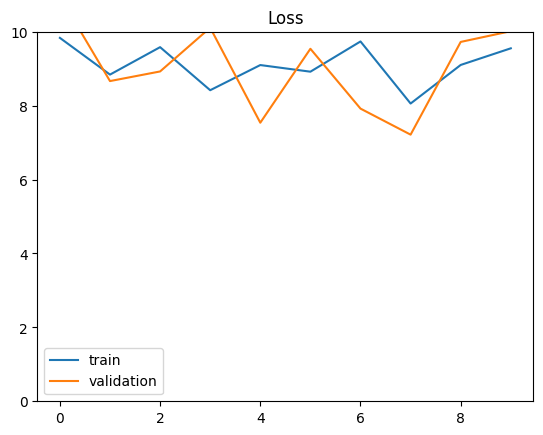

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD


# Create a simple linear regression model
model = Sequential()

# You can use `model.add(<layer>)` to add layers to the model
model.add(Flatten(input_shape=X_train.shape[1:]))

# With an activation function
# model.add(Dense(num_classes, activation='softmax'))

# No activation function
model.add(Dense(num_classes))

# Compile the model using `model.compile()`
# Adam optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Stochastic Gradient Descent with a learning rate of 0.01
# model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model with `model.fit()`
history = model.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model with `model.evaluate()`
test_loss, test_acc = model.evaluate(X_test, y_test_one_hot)
print('Test accuracy:', test_acc)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.ylim(0, 10)
plt.legend(loc='best')
plt.title('Loss');


Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

Results: The training and validation accuracy and loss show fluctuations across the epochs, rather than a consistent increasing or decreasing trend. The baseline performance is quite low as expected for a simple linear model.

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.8175 - loss: 0.5277 - val_accuracy: 0.8858 - val_loss: 0.3170
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.8991 - loss: 0.2844 - val_accuracy: 0.8853 - val_loss: 0.3172
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9125 - loss: 0.2410 - val_accuracy: 0.8883 - val_loss: 0.3075
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9201 - loss: 0.2156 - val_accuracy: 0.9010 - val_loss: 0.2815
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.9317 - loss: 0.1925 - val_accuracy: 0.9003 - val_loss: 0.2917
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9387 - loss: 0.1659 - val_accuracy: 0.9008 - val_loss: 0.2978
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.9446 - loss: 0.1531 - val_accuracy: 0.9010 - val_loss: 0.3045
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9507 -

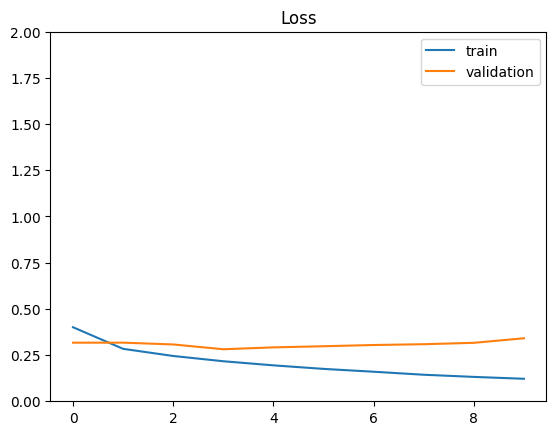

In [ ]:
from keras.layers import Conv2D

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential()

# Adding a convolutional layer with 32 filters of size 3x3.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Adding the Flatten Layer to flatten the 2D output of the convolutional layer into a 1D vector.
model.add(Flatten())

# Adding the Dense Layer for a fully connected layer.
model.add(Dense(num_classes, activation='softmax'))

# Train the model and save history
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.1)

# Evaluating the model
test_loss, test_acc = model.evaluate(X_test, y_test_one_hot)
print('Test accuracy:', test_acc)

# Plotting loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.ylim(0, 2)
plt.legend(loc='best')
plt.title('Loss');


Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

Results:

- The baseline model achieved a test accuracy of approximately 25.9%.
- The simple CNN model achieved a test accuracy of approximately 89.9%.

Conclusion:
- The CNN model performed better than the baseline model on the test set.
- The higher accuracy of the CNN suggests that the convolutional layer was effective in learning more complex features from the image data leading to better performance.

# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

Testing with 16 filters...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test accuracy with 16 filters: 0.8952
Testing with 32 filters...
Test accuracy with 32 filters: 0.8957
Testing with 64 filters...
Test accuracy with 64 filters: 0.8983

Results for different numbers of filters:
Number of filters: 16, Test Accuracy: 0.8952
Number of filters: 32, Test Accuracy: 0.8957
Number of filters: 64, Test Accuracy: 0.8983


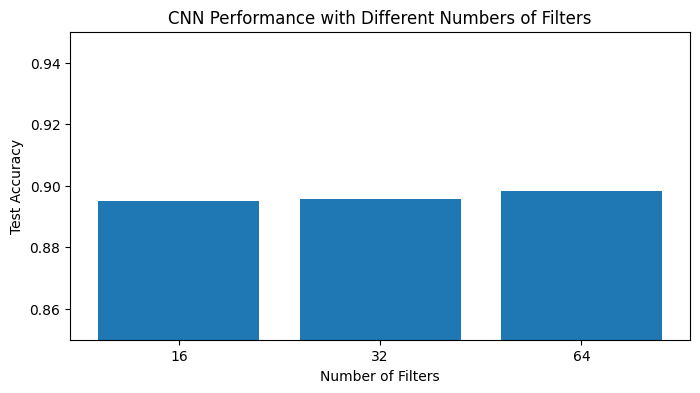

In [ ]:
# A. Test Hyperparameters
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D
import matplotlib.pyplot as plt

# Experimenting with number of filters in the convolutional layer
num_filters_options = [16, 32, 64]
results_filters = {}

for num_filters in num_filters_options:
    print(f"Testing with {num_filters} filters...")

    # Initialize the model
    model = Sequential()
    model.add(Conv2D(num_filters, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    # Compiling the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Training the model
    history = model.fit(X_train, y_train_one_hot, epochs=5, batch_size=32, validation_split=0.1, verbose=0)

    # Evaluating the model
    test_loss, test_acc = model.evaluate(X_test, y_test_one_hot, verbose=0)
    print(f"Test accuracy with {num_filters} filters: {test_acc:.4f}")

    # Storing results
    results_filters[num_filters] = test_acc

# Printing summarized results
print("\nResults for different numbers of filters:")
for num_filters, accuracy in results_filters.items():
    print(f"Number of filters: {num_filters}, Test Accuracy: {accuracy:.4f}")

# Visualizing results
plt.figure(figsize=(8, 4))
plt.bar(range(len(results_filters)), list(results_filters.values()), align='center')
plt.xticks(range(len(results_filters)), list(results_filters.keys()))
plt.ylabel('Test Accuracy')
plt.xlabel('Number of Filters')
plt.title('CNN Performance with Different Numbers of Filters')
plt.ylim(0.85, 0.95)
plt.show()

Testing with Dropout (rate=0.25)...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - accuracy: 0.8088 - loss: 0.5421 - val_accuracy: 0.8782 - val_loss: 0.3378
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.8906 - loss: 0.3032 - val_accuracy: 0.8940 - val_loss: 0.2984
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 0.9062 - loss: 0.2599 - val_accuracy: 0.8950 - val_loss: 0.2952
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.9163 - loss: 0.2345 - val_accuracy: 0.8983 - val_loss: 0.2905
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.9210 - loss: 0.2186 - val_accuracy: 0.8955 - val_loss: 0.2933
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8999 - loss: 0.3034
Test accuracy with Dropout: 0.8986
Testing without Dropout...
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.8091 - loss: 0.5430 - val_accuracy: 0.8828 - val_loss: 0.3312
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.8968 - l

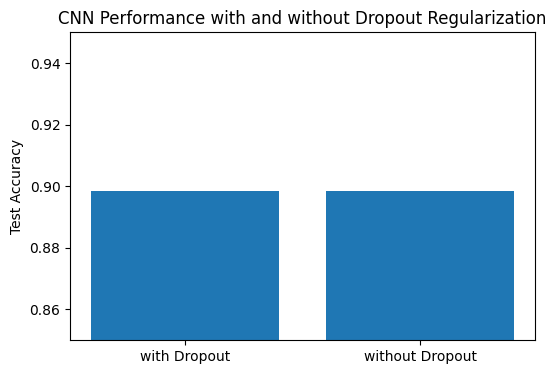

In [ ]:
# B. Test presence or absence of regularization
from keras.layers import Dropout

# Experimenting with Dropout regularization
dropout_rate = 0.25
results_regularization = {}

# Model with Dropout
print(f"Testing with Dropout (rate={dropout_rate})...")
model_dropout = Sequential()

# Using 32 filters based on previous experiment or as a starting point
model_dropout.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_dropout.add(Flatten())

# Adding Dropout layer
model_dropout.add(Dropout(dropout_rate))

model_dropout.add(Dense(num_classes, activation='softmax'))

model_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_dropout = model_dropout.fit(X_train, y_train_one_hot, epochs=5, batch_size=32, validation_split=0.1)
test_loss_dropout, test_acc_dropout = model_dropout.evaluate(X_test, y_test_one_hot)

print(f"Test accuracy with Dropout: {test_acc_dropout:.4f}")
results_regularization['with Dropout'] = test_acc_dropout

# Modeling without Dropout (Simple CNN as a comparison)
print("Testing without Dropout...")
model_no_dropout = Sequential()

# Same architecture as above
model_no_dropout.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_no_dropout.add(Flatten())
model_no_dropout.add(Dense(num_classes, activation='softmax'))

model_no_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_no_dropout = model_no_dropout.fit(X_train, y_train_one_hot, epochs=5, batch_size=32, validation_split=0.1)
test_loss_no_dropout, test_acc_no_dropout = model_no_dropout.evaluate(X_test, y_test_one_hot)
print(f"Test accuracy without Dropout: {test_acc_no_dropout:.4f}")
results_regularization['without Dropout'] = test_acc_no_dropout


# Printing summarized results
print("\nResults for regularization experiment:")
for regularization_type, accuracy in results_regularization.items():
    print(f"{regularization_type}: Test Accuracy: {accuracy:.4f}")

# Visualizing results
plt.figure(figsize=(6, 4))
plt.bar(range(len(results_regularization)), list(results_regularization.values()), align='center')
plt.xticks(range(len(results_regularization)), list(results_regularization.keys()))
plt.ylabel('Test Accuracy')
plt.title('CNN Performance with and without Dropout Regularization')
plt.ylim(0.85, 0.95)
plt.show()

Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

Hyperparameter Experiment (Number of Filters):
- Increasing the number of filters in the convolutional layer from 16 to 64 generally led to a slight improvement in test accuracy.
- The model with 64 filters had the highest accuracy among the values tested in this experiment (approximately 0.8983).


Regularization Experiment (Dropout):
- The model with Dropout (rate 0.25) had a test accuracy of approximately 0.8986, while the model without Dropout had a test accuracy of approximately 0.8985.
- The impact of Dropout on test accuracy appears minimal.

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 66s 38ms/step - accuracy: 0.8134 - loss: 0.5285 - val_accuracy: 0.8843 - val_loss: 0.3175
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 64s 38ms/step - accuracy: 0.8955 - loss: 0.2882 - val_accuracy: 0.8922 - val_loss: 0.2995
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 66s 39ms/step - accuracy: 0.9106 - loss: 0.2493 - val_accuracy: 0.8978 - val_loss: 0.2857
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 67s 40ms/step - accuracy: 0.9219 - loss: 0.2166 - val_accuracy: 0.8992 - val_loss: 0.2913
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 66s 39ms/step - accuracy: 0.9294 - loss: 0.1955 - val_accuracy: 0.9020 - val_loss: 0.2864
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 67s 39ms/step - accuracy: 0.9379 - loss: 0.1700 - val_accuracy: 0.9010 - val_loss: 0.3012
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 63s 37ms/step - accuracy: 0.9433 - loss: 0.1604 - val_accuracy: 0.9045 - val_loss: 0.2953
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 62s 37ms/step - accuracy: 0.9468 -

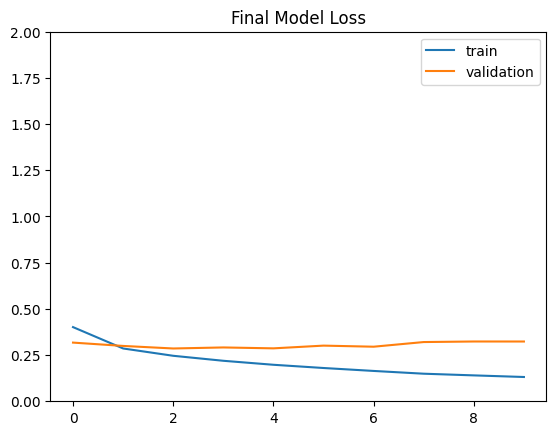

In [ ]:
# The model with 64 filters with Dropout (rate 0.25) had the highest test accuracy
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout
import matplotlib.pyplot as plt

final_model = Sequential()
final_model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
final_model.add(Flatten())
final_model.add(Dropout(0.25))
final_model.add(Dense(num_classes, activation='softmax'))

final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the final model
history_final = final_model.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the final model
test_loss_final, test_acc_final = final_model.evaluate(X_test, y_test_one_hot)
print('Final model test accuracy:', test_acc_final)

# Plotting loss for the final model
plt.plot(history_final.history['loss'], label='train')
plt.plot(history_final.history['val_loss'], label='validation')
plt.ylim(0, 2)
plt.legend(loc='best')
plt.title('Final Model Loss');
plt.show()


Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

Results:
- Baseline Model: 25.9%
- Simple CNN Model: 89.9%
- Final Model (with 64 filters and Dropout): 90.0%

The final model shows improvement in test accuracy compared to the simple CNN and a significant improvement over the baseline model.

Contributing factors:
- 64 filters extracted richer edges and textures improving class separation.
- Dropout(0.25) provided regularization balancing overfitting and underfitting.
- Adam optimizer offered effective adaptive learning improving convergence and stability.

Potential improvments (Future experiments):
- Early stopping: Looking at the plots from the training history I can see that the training loss continues to decrease throughout the 10 epochs but the validation loss starts to level off and even slightly increase after around epoch 7 or 8 which suggests that the model might be starting to overfit the training data. One consideration is stopping the training earlier at around epoch 7 or 8 where the validation loss was at its lowest point could potentially lead to a model that generalizes better to new data and might have resulted in a slightly higher test accuracy.

- Dropout rates: Trying a higher dropout rate instead of 0.25 could potentially help further mitigate overfitting forceing the network to learn more features that are not dependent on any single neuron which can improve generalization to unseen data.



🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 26/10/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
    * The Lab 3 notebook (labs/lab_3.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-7-help-ml`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.